# Analyse de la Variabilité pour l'Associativité

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
# charger le fichier CSV
df = pd.read_csv("variability_results.csv")

# les premières lignes
df.head()

,seed,n,range_max,success,percent
0,NaN,1000,100000000.00,922,92.20
1,NaN,1000,10000000000000000.00,921,92.10
2,NaN,10000,100000000.00,9207,92.07
3,NaN,10000,10000000000000000.00,9269,92.69
4,42.00,1000,100000000.00,920,92.00


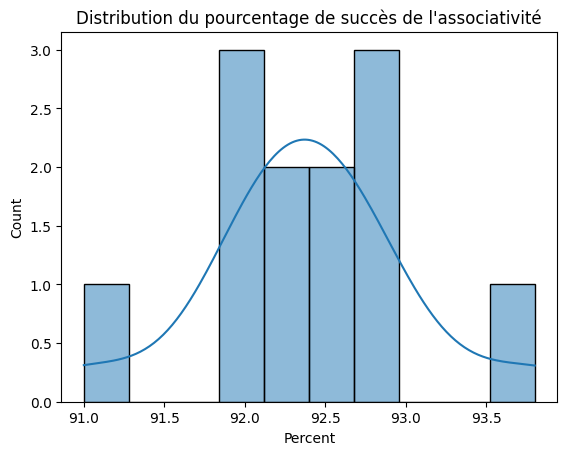

In [5]:
sns.histplot(df['percent'], bins=10, kde=True)
plt.title("Distribution du pourcentage de succès de l'associativité")
plt.xlabel("Percent")
plt.ylabel("Count")
plt.show()

## On peut visualiser si le succès est concentré entre 92% et 93% 

## On utilise un arbre de décision pour identifier les combinaisons de paramètres qui expliquent le mieux le succès.

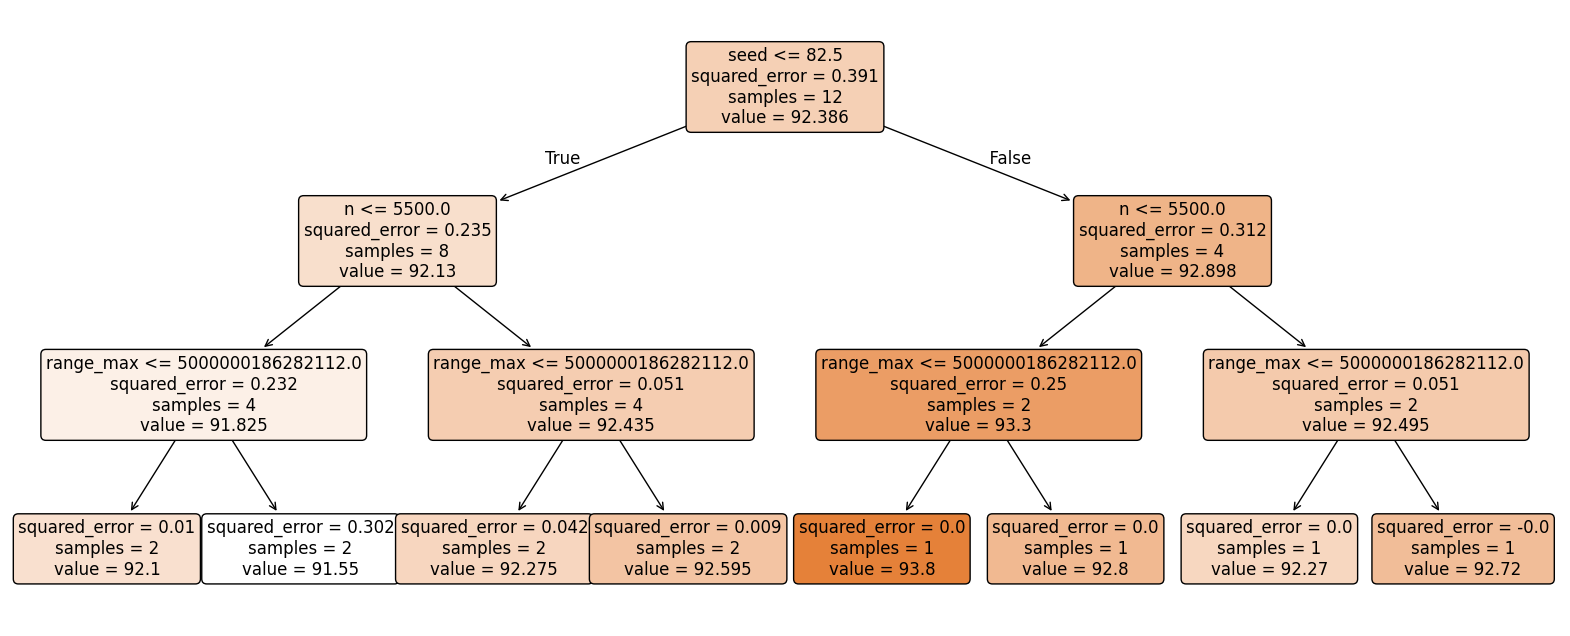

In [7]:
X = df[['seed', 'n', 'range_max']]
y = df['percent']

# créer un arbre de décision pour interprétation
tree = DecisionTreeRegressor(max_depth=3) 
tree.fit(X, y)

plt.figure(figsize=(20,8))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.show()

## Importance des variables

In [8]:
importance = pd.Series(tree.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)

seed        0.40
n           0.35
range_max   0.25
dtype: float64

## Recommandations
### on identifie les combinaisons qui donnent un succès >= 92.5%

In [18]:
stable_conditions = df[df['percent'] >= 92.5]
stable_conditions

,seed,n,range_max,success,percent
3,NaN,10000,10000000000000000.00,9269,92.69
7,42.00,10000,10000000000000000.00,9250,92.50
8,123.00,1000,100000000.00,938,93.80
9,123.00,1000,10000000000000000.00,928,92.80
11,123.00,10000,10000000000000000.00,9272,92.72
